In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import os
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [157]:
data=pd.read_excel('zomato_train.xlsx')

In [158]:
data.head(3)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4


In [159]:
print("dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

dataset contains 41373 rows and 17 columns


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [129]:
data.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [130]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [131]:
data.duplicated().sum()

0

# Exploratory Data Analysis

Number of Restaurants acoording to Area

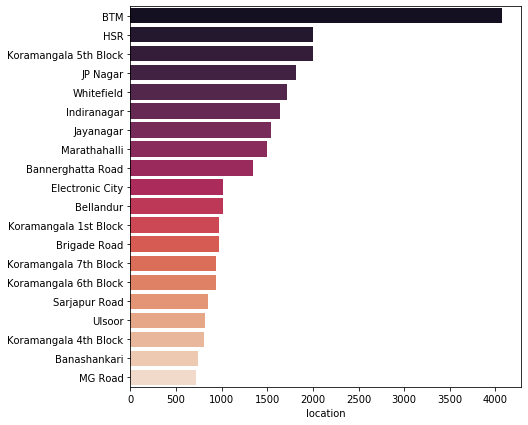

In [70]:
plt.figure(figsize=(7,7))  
Rest_locations=data['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

1. We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
2. BTM dominates the section by having more than 4000 restaurants.

Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

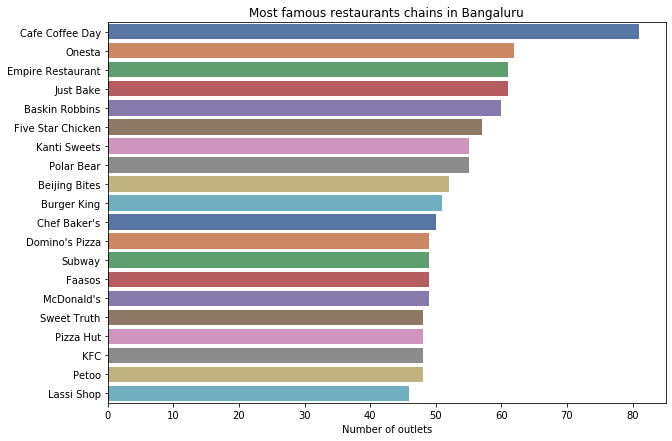

In [12]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

CCD,Onesta,Empire,Just Bake has the most number of outlets in and around bangalore.

Number of the Restuarants who do not accept online orders.

In [233]:
x=data['online_order'].value_counts()
colors = ['#008000', '#8B0000']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Accepting vs not accepting online orders",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

What is the ratio b/w restaurants that provide and do not provide table booking ?

In [234]:
x=data['book_table'].value_counts()
colors = ['#FF0000', '#008000']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Table booking",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

Approximately 88% of the Restuarants does not provide Table bookings

Restaurant rating distribution

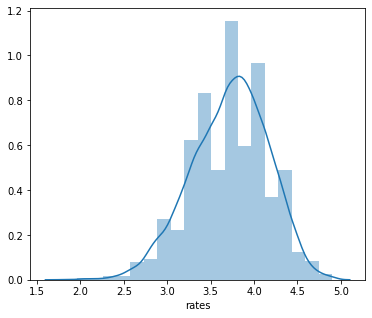

In [26]:
plt.figure(figsize=(6,5))
rating=data['rates'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

1. Almost more than 65 percent of restaurants has rating between 3 and 4.5 .
2. Restaurants having rating more than 4.5 are very rare.

Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [134]:
votes_yes=data[data['online_order']=="Yes"]['votes']
trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

votes_no=data[data['online_order']=="No"]['votes']
trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))

layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

Most popular cuisines of Bangalore

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

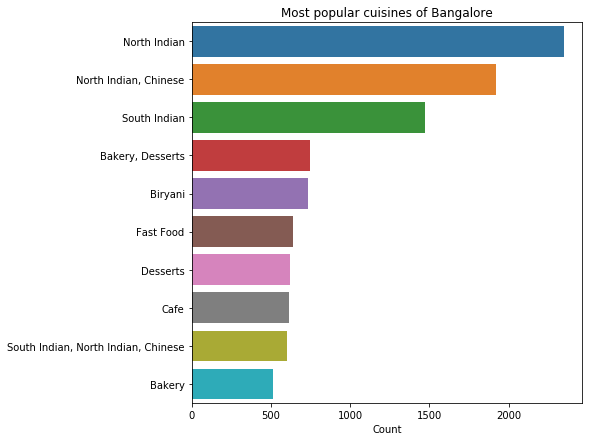

In [68]:
plt.figure(figsize=(7,7))
cuisines=data['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

We can observe that North Indian,chinese,and South Indian  are most common.

Which are the most common restaurant type in Banglore?

Text(0.5, 0, 'count')

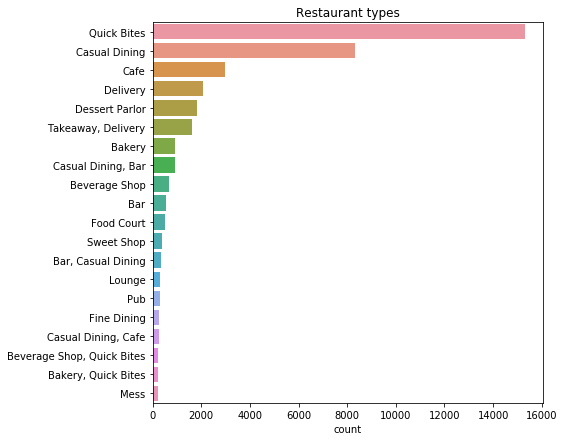

In [69]:
plt.figure(figsize=(7,7))
rest=data['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

Percentage of restaurants according to their types

# Data pre-processing

In [161]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

1. 50% of the data from dish_liked variable are missing
2. Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [162]:
zomato=data.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

Renaming "approx_cost(for two people)" ,listed_in(type) and listed_in(city) as they have multiple data-types

In [163]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_for_2_people', 'reviews_list',
       'menu_item', 'listed_in_type', 'listed_in_city', 'rates'],
      dtype='object')

  Converting "votes" and "approx_cost_for_2_people" into numeric(int)

  "votes" and "approx_cost_for_2_people" have values like 1,000. So we will change them into pure numeric values.
For this, we will use the lambda function

In [175]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

In [177]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41317 entries, 0 to 41316
Data columns (total 14 columns):
address                     41317 non-null object
name                        41317 non-null object
online_order                41317 non-null object
book_table                  41317 non-null object
votes                       41317 non-null int32
location                    41302 non-null object
rest_type                   41142 non-null object
cuisines                    41285 non-null object
approx_cost_for_2_people    41042 non-null float64
reviews_list                41317 non-null object
menu_item                   41317 non-null object
listed_in_type              41317 non-null object
listed_in_city              41317 non-null object
rates                       33336 non-null object
dtypes: float64(1), int32(1), object(12)
memory usage: 4.3+ MB


 Now we will convert "rate" into float

 Checking unique values of "rate"

In [178]:
zomato['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', nan, '3.2 ', '3.3 ', '2.9', '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '3.3', '2.6', '4.0', '2.8',
       '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

In [184]:
zomato = zomato.loc[zomato.rates !='-'].reset_index(drop=True)
zomato.rates = zomato.rates.astype('float')

In [185]:
zomato['rates'].head()

0    3.1
1    4.6
2    3.4
3    4.3
4    3.7
Name: rates, dtype: float64

In [186]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41317 entries, 0 to 41316
Data columns (total 14 columns):
address                     41317 non-null object
name                        41317 non-null object
online_order                41317 non-null object
book_table                  41317 non-null object
votes                       41317 non-null int32
location                    41302 non-null object
rest_type                   41142 non-null object
cuisines                    41285 non-null object
approx_cost_for_2_people    41042 non-null float64
reviews_list                41317 non-null object
menu_item                   41317 non-null object
listed_in_type              41317 non-null object
listed_in_city              41317 non-null object
rates                       33336 non-null float64
dtypes: float64(2), int32(1), object(11)
memory usage: 4.3+ MB


 we can see that 'rate' column has converted to float datatype

 Now we will Label Encode the input variable columns into 0,1,2...



In [187]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rates', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [189]:
zomato_en['rates'] = zomato_en['rates'].fillna(zomato_en['rates'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())


In [190]:
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
rates                       0
dtype: int64

# Model Building

Checking for correlation among all the independent variables x(inputs)

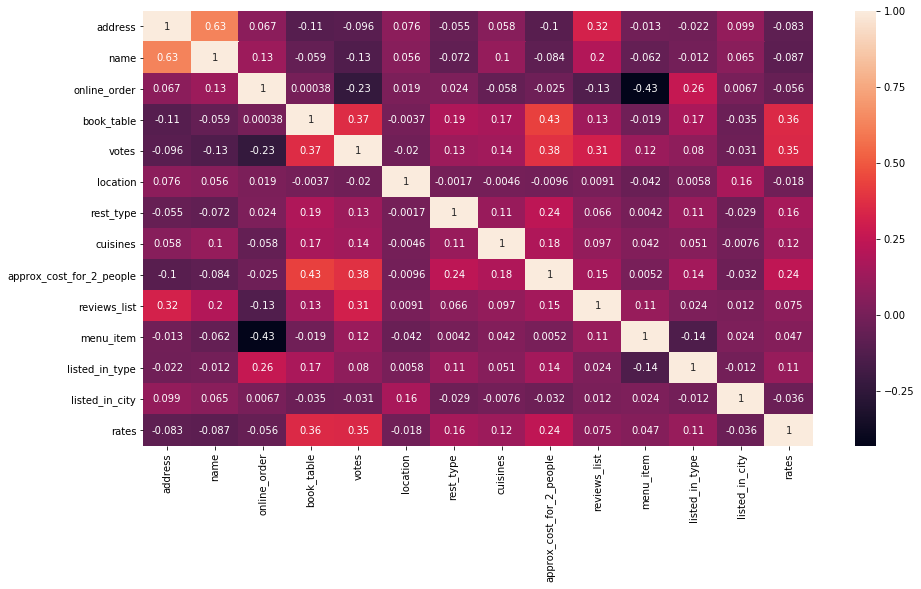

In [191]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [192]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_for_2_people', 'reviews_list',
       'menu_item', 'listed_in_type', 'listed_in_city', 'rates'],
      dtype='object')

The highest correlation is between name and address which is 0.63 which is not of very much concern
Splitting dataset into train & test

In [199]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rates']

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [201]:
x_train.head()

,online_order,book_table,location,rest_type,cuisines,approx_cost_for_2_people,reviews_list,listed_in_type
37381,1,0,30,6,2033,600.0,18292,4
36948,0,0,33,0,469,300.0,899,1
12188,0,0,2,10,1817,400.0,6684,0
39879,1,0,42,6,226,700.0,19089,4
16446,1,0,44,0,55,350.0,10163,1


In [202]:
y_train.head()

37381    4.6
36948    3.2
12188    3.1
39879    3.8
16446    3.1
Name: rates, dtype: float64

# LINEAR REGRESSION

In [203]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2037329589149811

With LINEAR REGRESSION, we are getting an accuracy of 20 %

# DECISION TREE REGRESSION

In [207]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [226]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [227]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [228]:
r2_score(y_test,y_predict)

0.6434295738872288

with DECISION TREE REGRESSION we are getting an accurecy of 64%


# RANDOM FOREST REGRESSION

In [214]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [230]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [231]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6841226096216296

with RANDOM FOREST REGRESSION wer are getting an accurecy of 68% which is the highest among all